# **Проверка гипотез по увеличению выручки в интернет-магазине — оценка результатов A/B теста**

**Описание данных**       
Данные для первой части       
Файл /datasets/hypothesis.csv. Скачать датасет       
Hypothesis — краткое описание гипотезы;       
Reach — охват пользователей по 10-балльной шкале;       
Impact — влияние на пользователей по 10-балльной шкале;       
Confidence — уверенность в гипотезе по 10-балльной шкале;       
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.       
Данные для второй части       
Файл /datasets/orders.csv. Скачать датасет       
transactionId — идентификатор заказа;       
visitorId — идентификатор пользователя, совершившего заказ;       
date — дата, когда был совершён заказ;       
revenue — выручка заказа;       
group — группа A/B-теста, в которую попал заказ.       
Файл /datasets/visitors.csv. Скачать датасет       
date — дата;       
group — группа A/B-теста;       
visitors — количество пользователей в указанную дату в указанной группе A/B-теста       

In [1]:
# Импортируем библитеки

# импорт библиотек
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings
from collections import defaultdict

In [2]:
# параметры визуализации
sns.set(
    font_scale =2,
    style      ='whitegrid',
    rc         ={'figure.figsize':(20,7)}
)
%config InlineBackend.figure_format = 'retina'

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('max_colwidth', 150) 

## hypothesis обзор таблицы

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
display(hypothesis.duplicated().sum())
hypothesis.columns = [a.lower() for a in hypothesis.columns]
hypothesis

0

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Вывод**            
В данной таблице мы наблюдаем 9 гипотез со следующими колонками:        
Hypothesis — краткое описание гипотезы;        
Reach — охват пользователей по 10-балльной шкале;        
Impact — влияние на пользователей по 10-балльной шкале;        
Confidence — уверенность в гипотезе по 10-балльной шкале;        
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.         

Для удобства работы все колонки были переведены к нижнему регистру.

# Применение фреймворка ICE для приоритизации гипотез. Сортировка по убыванию приоритета.

In [6]:
hypothesis['ICE'] = hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis.loc[:, ['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


# Применение фреймворка RICE для приоритизации гипотез. Сортировка по убыванию приоритета

In [7]:
hypothesis['RICE'] = hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis.loc[:, ['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [8]:
hypothesis.merge(hypothesis)
hypothesis[['hypothesis', 'ICE', 'RICE']]

,hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2


In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl

df = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, np.nan],[19, 439, 6, 452, 226,232]],
                  index=pd.Index(['Tumour (Positive)', 'Non-Tumour (Negative)'], name='Actual Label:'),
                  columns=pd.MultiIndex.from_product([['Decision Tree', 'Regression', 'Random'],['Tumour', 'Non-Tumour']], names=['Model:', 'Predicted:']))
df.style

In [10]:
#df.style.format(precision=0, na_rep='MISSING', thousands=" ",
#                formatter={('Decision Tree', 'Tumour'): "{:.2f}",
#                           ('Regression', 'Non-Tumour'): lambda x: "$ {:,.1f}".format(x*-1e6)
#                          })

**Вывод**      
Наиболее перспективные гипотезы по ICE:

Запустить акцию, дающую скидку на товар в день рождения
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Наиболее перспективные гипотезы по RICE:

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
Запустить акцию, дающую скидку на товар в день рождения
Поскольку RICE включает в себя еще один параметр ('Reach'), то именно он оказал влияние на перестановку гипотез по степени приоритетности.

Первая пятерка гипотез совпадает у ICE и RICE, но в разной последовательности. Занявшая по ICE первое место гипотеза "Запустить акцию, дающую скидку на товар в день рождения" опустилась на пятое место по RICE, т.к. охват у нее оказался самым низким - всего 1 балл. Это вполне логично, т.к. данная акция доступна пользователям раз в год, что существенно сужает возможности ее применения.

При этом гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" поднялась с третьего на первое место, т.к. затрагивает практически всех пользователей. Гипотеза по охвату набрала 10 баллов.

Еще одна гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" заметно вышла на второе место с пятого также за счет высокого балла по охвату (8 баллов).

Гипотезы фреймворка RICE, набравшие наибольшее количество баллов, являются наиболее приоритетными. Именно их рекомендуется использовать при проведении A/B-теста.

# Анализ A/B-теста

## Изучение данных из файла и предобработка

In [11]:
# чтение файлов с данными
orders = pd.read_csv('/datasets/orders.csv')

In [12]:
display(orders.head(),
orders.describe(),
orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


None

In [13]:
# чтение файлов с данными
visitors = pd.read_csv('/datasets/visitors.csv')

In [14]:
display(visitors.head(),
visitors.describe(),
visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


None

In [15]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [16]:
def dates(x):
    display(x.date.min())
    display(x.date.max())

In [17]:
dates(orders)

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [18]:
dates(visitors)

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [19]:
# общее количество заказов в двух группах
orders.groupby('group').agg({'transactionId' : 'count'})

,transactionId
group,
A,557
B,640


In [20]:
# общее количество уникальных пользователей в двух группах
orders.groupby('group').agg({'visitorId' : 'nunique'})

,visitorId
group,
A,503
B,586


In [21]:
# количество уникальных пользователей, которые оказались одновременно в двух группах
unique_visitors = orders.loc[:, ['visitorId', 'group']].drop_duplicates().drop(columns=['group'])
unique_visitors = unique_visitors.visitorId.duplicated()
unique_visitors

0       False
1       False
2       False
3       False
4       False
        ...  
1191    False
1192    False
1193    False
1194    False
1196    False
Name: visitorId, Length: 1089, dtype: bool

In [22]:
orders = orders.query('visitorId not in @unique_visitors != True')

In [23]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


**Вывод**         
В ходе обработки столбцов связанных с датой был перевод их с помощью to_datetime.

В таблице orders минимальная выручка заказа составил 50 ед., максимальная - 1 294 500 ед. Средняя выручка - 8 348,01 ед., медиана - 2 978 ед.

В таблице visitors количество пользователей за день в группе A/B-теста варьировалось от 361 до 770. Среднее число - 607,29, медиана - 624,5.

Минимальная и максимальная дата в двух таблицах совпадает - 1 августа 2019 г. и 31 августа 2019 г. соответственно. Эти даты нужны будут для построения графиков.

Дубликаты в таблицах не выявлены. Однако была выявленна группа пользователей, состоящая в обеих группах одновременно. В целях недопущения влияния на результаты исследования, данную группу было решено удалить, так как невозможно предсказать какой именно вариант пользователю понравился больше.

Общее количество заказов в группах не совпадает. В группе А зафиксировано 557 заказов, в группе В - 640. Сравнение уникальных пользователей также выявило различия. В группе В на 83 уникальных пользователя больше. Кроме того, в группе А и группе В оказалось 58 пользователей одновременно. Количество пользователей в различных группах не должно превышать 1% для успешного проведения теста. Некорректное деление трафика теста влияет на качество анализа.

# Создание графика кумулятивной выручки по группам.

In [24]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

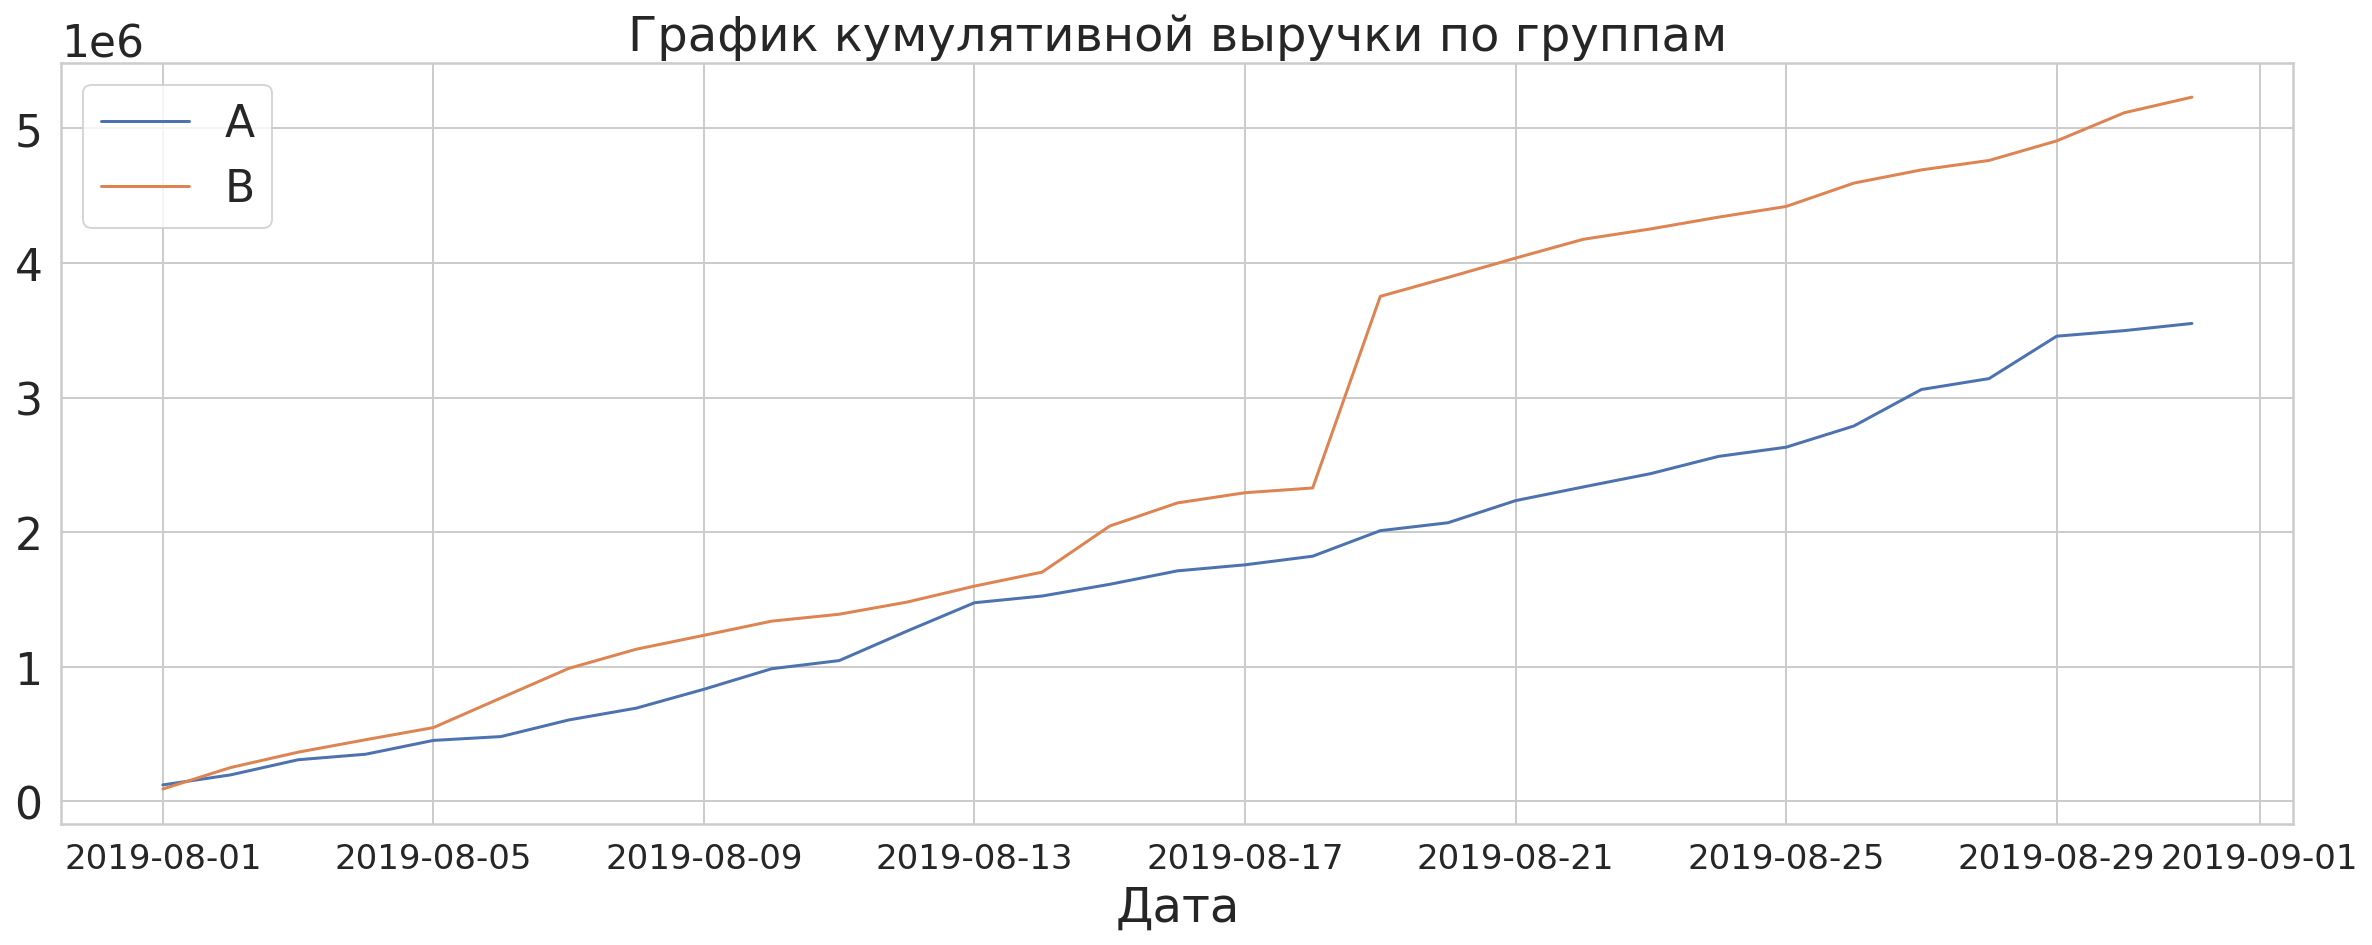

In [25]:
# создание датафрейма datesGroups с уникальными парами значений 'date' и 'group', таблицы orders; удаление дубликатов
datesGroups = orders[['date', 'group']].drop_duplicates()


ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', # дата
            'group': 'max', # группа A/B-теста
            'transactionId': 'nunique', # число уникальных заказов в группе теста по указанную дату включительно
            'visitorId': 'nunique', # число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста
            'revenue': 'sum', # суммарная выручка заказов в группе теста по указанную дату включительно
        }
    ),
    axis=1,
).sort_values(by=['date', 'group']) # сортировка по столбцам 'date', 'group'


visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# определение переменной по колонкам 'date', 'group' методом merge()
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

# присвоение столбцам cumulativeData названия
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


# переменная с данными о датах, выручке и числе заказов в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]

# переменная с данными о датах, выручке и числе заказов в группе В
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
# график кумулятивной выручки по группам
# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=17)

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.legend();

**Вывод**      
Сегмент В с минимальным отрывом лидировал практически весь тест, а в определенные дни был на одном уровне с сегментом А. Но с 18 августа выручка у сегмента В резко подскочила вверх, по-видимому, количество заказов и/или очень дорогих товаров в заказах у данного сегмента значительно выросло. Выручка сегмента А росла практически равномерно весь месяц.

# Создание графика кумулятивного среднего чека по группам.

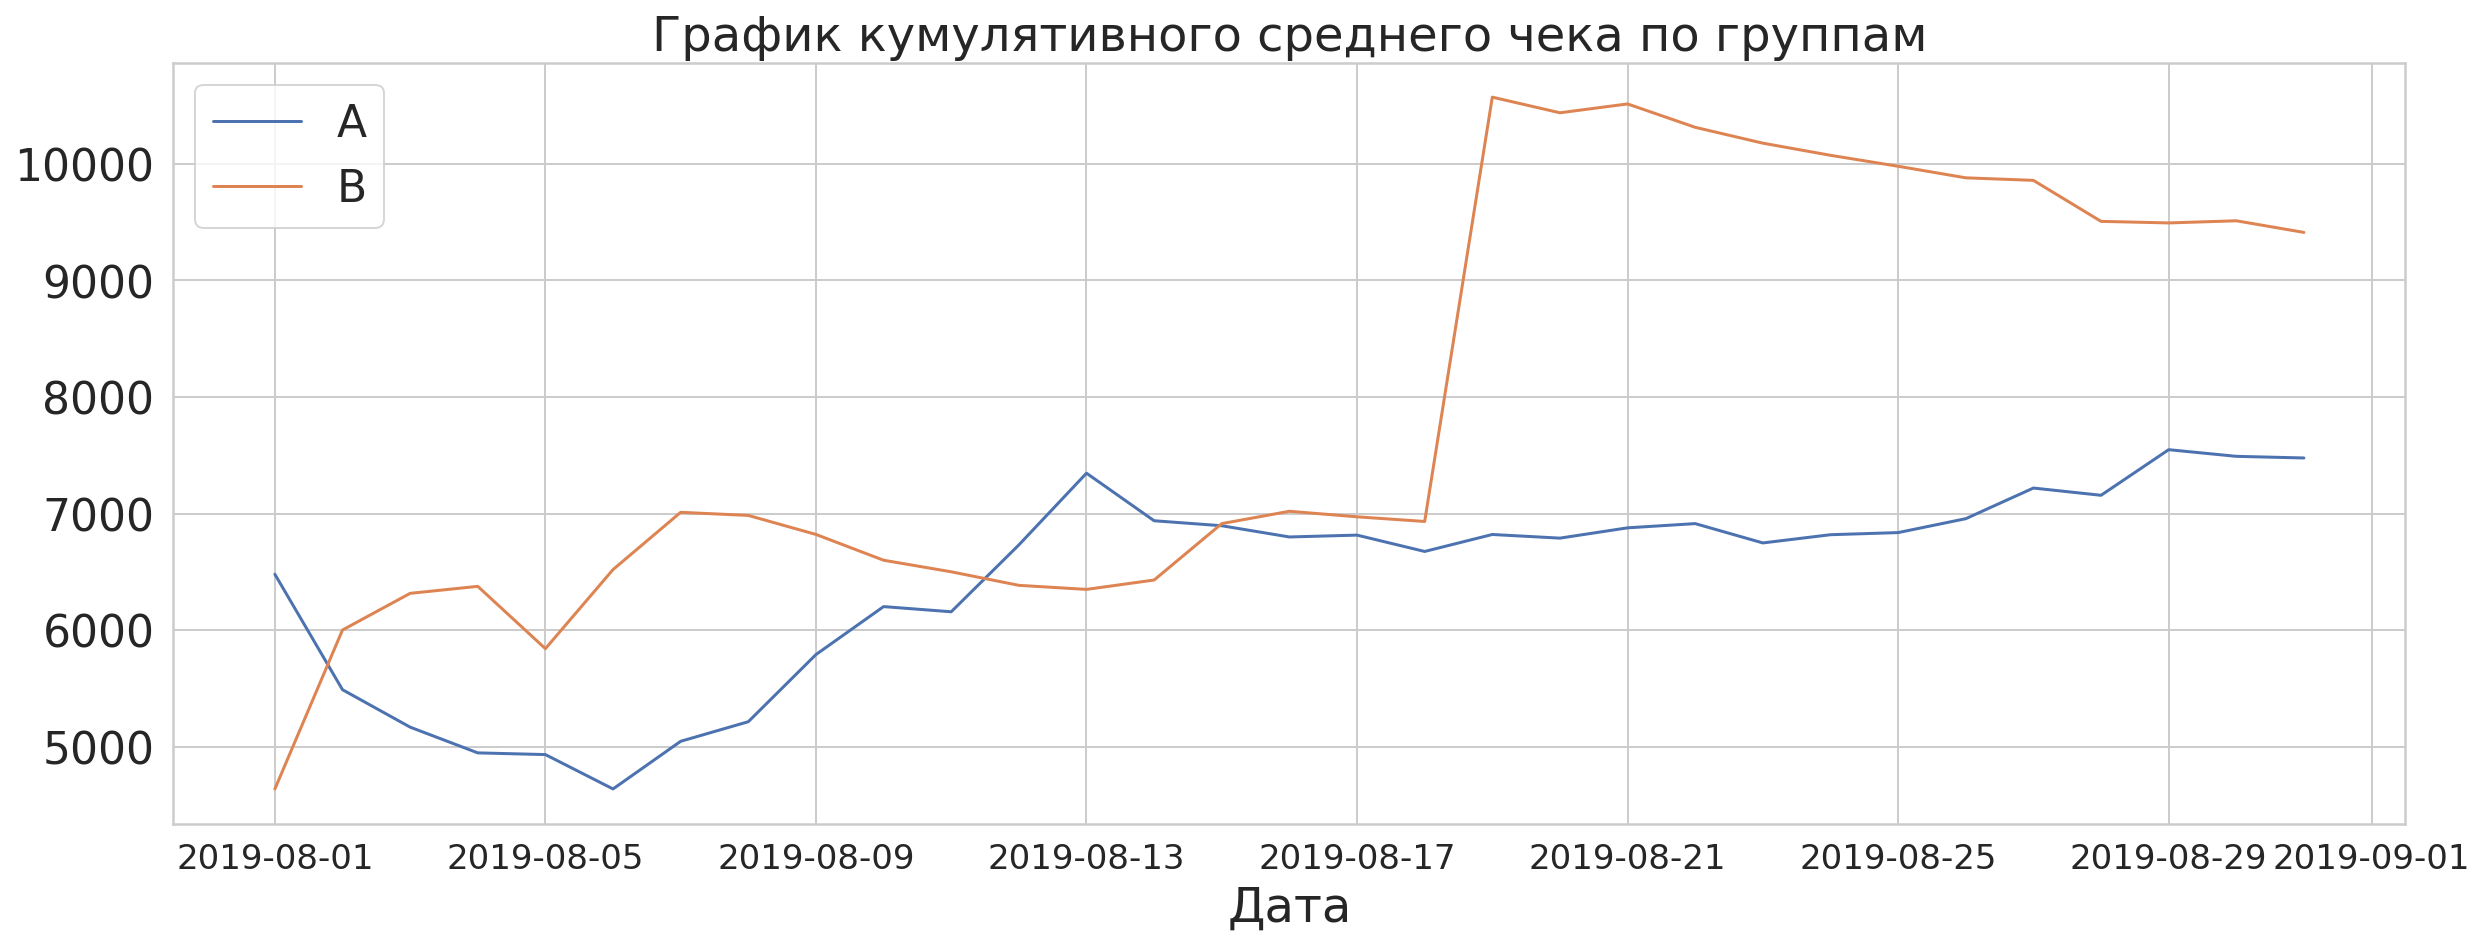

In [26]:
# график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=17)

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.legend();

**Вывод**      
Кумулятивное значение среднего чека к середине месяца выросло по двум сегментам, а затем немного снизилось. В сегменте А, в отличие от сегмента В, к концу месяца средний чек почти сравнялся с максимальным значением, достигнутым 13 августа. Но наиболее примечательно то, что 18 - 19 августа у сегмента В выявлен аномальный рост среднего чека. Скорее всего, были чрезмерно крупные заказы, которые могут влиять на результаты.

## Создание графика относительного изменения кумулятивного среднего чека группы B к группе A.

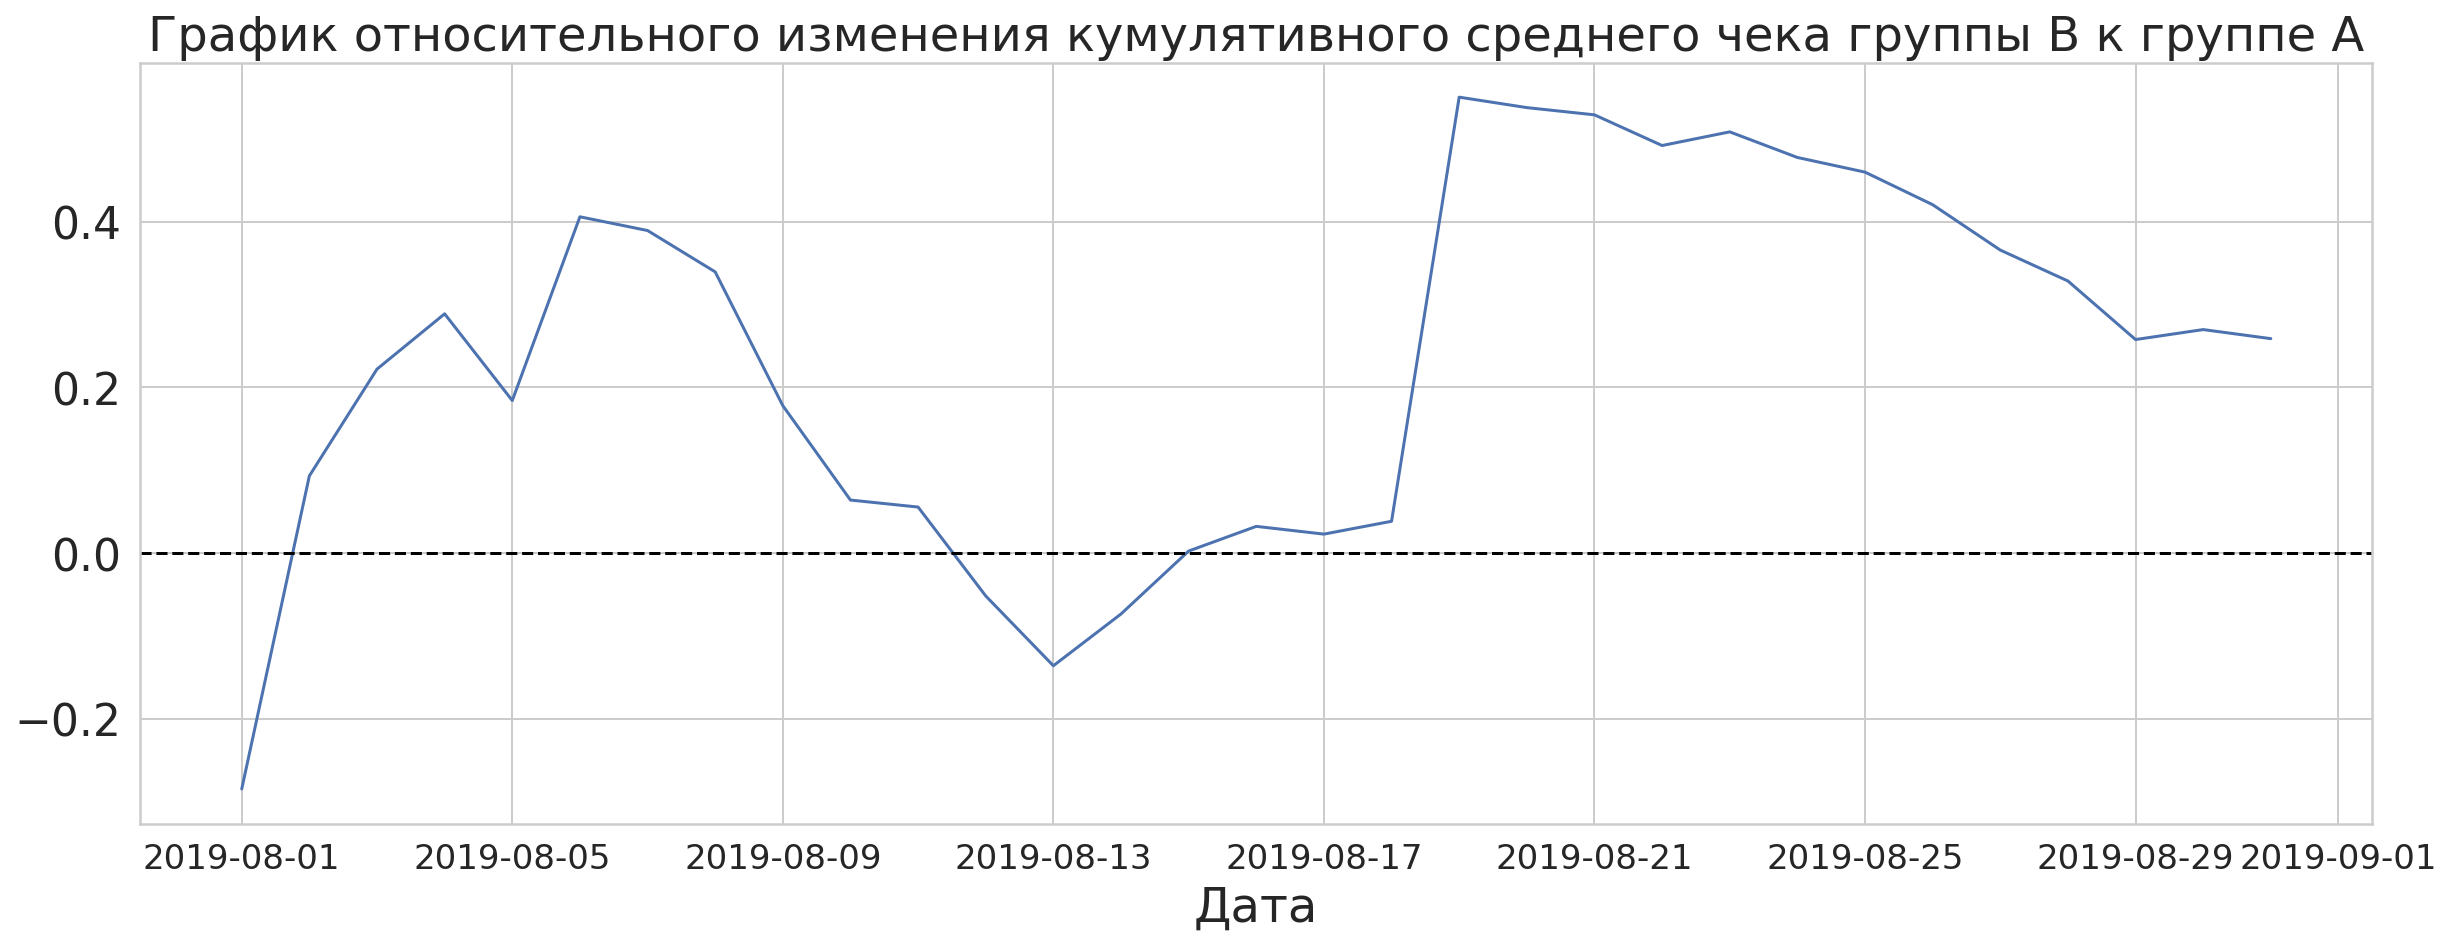

In [27]:
mergedCumulativeRevenue  = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                    left_on='date', 
                                                    right_on='date', 
                                                    how='left', 
                                                    suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
        (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1);

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=17)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата');

**Вывод**      
Результаты теста значительно и резко менялись в несколько дат. В одну из дат как раз и были совершены аномальные заказы сегментом В.

## Создание графика кумулятивной конверсии по группам.

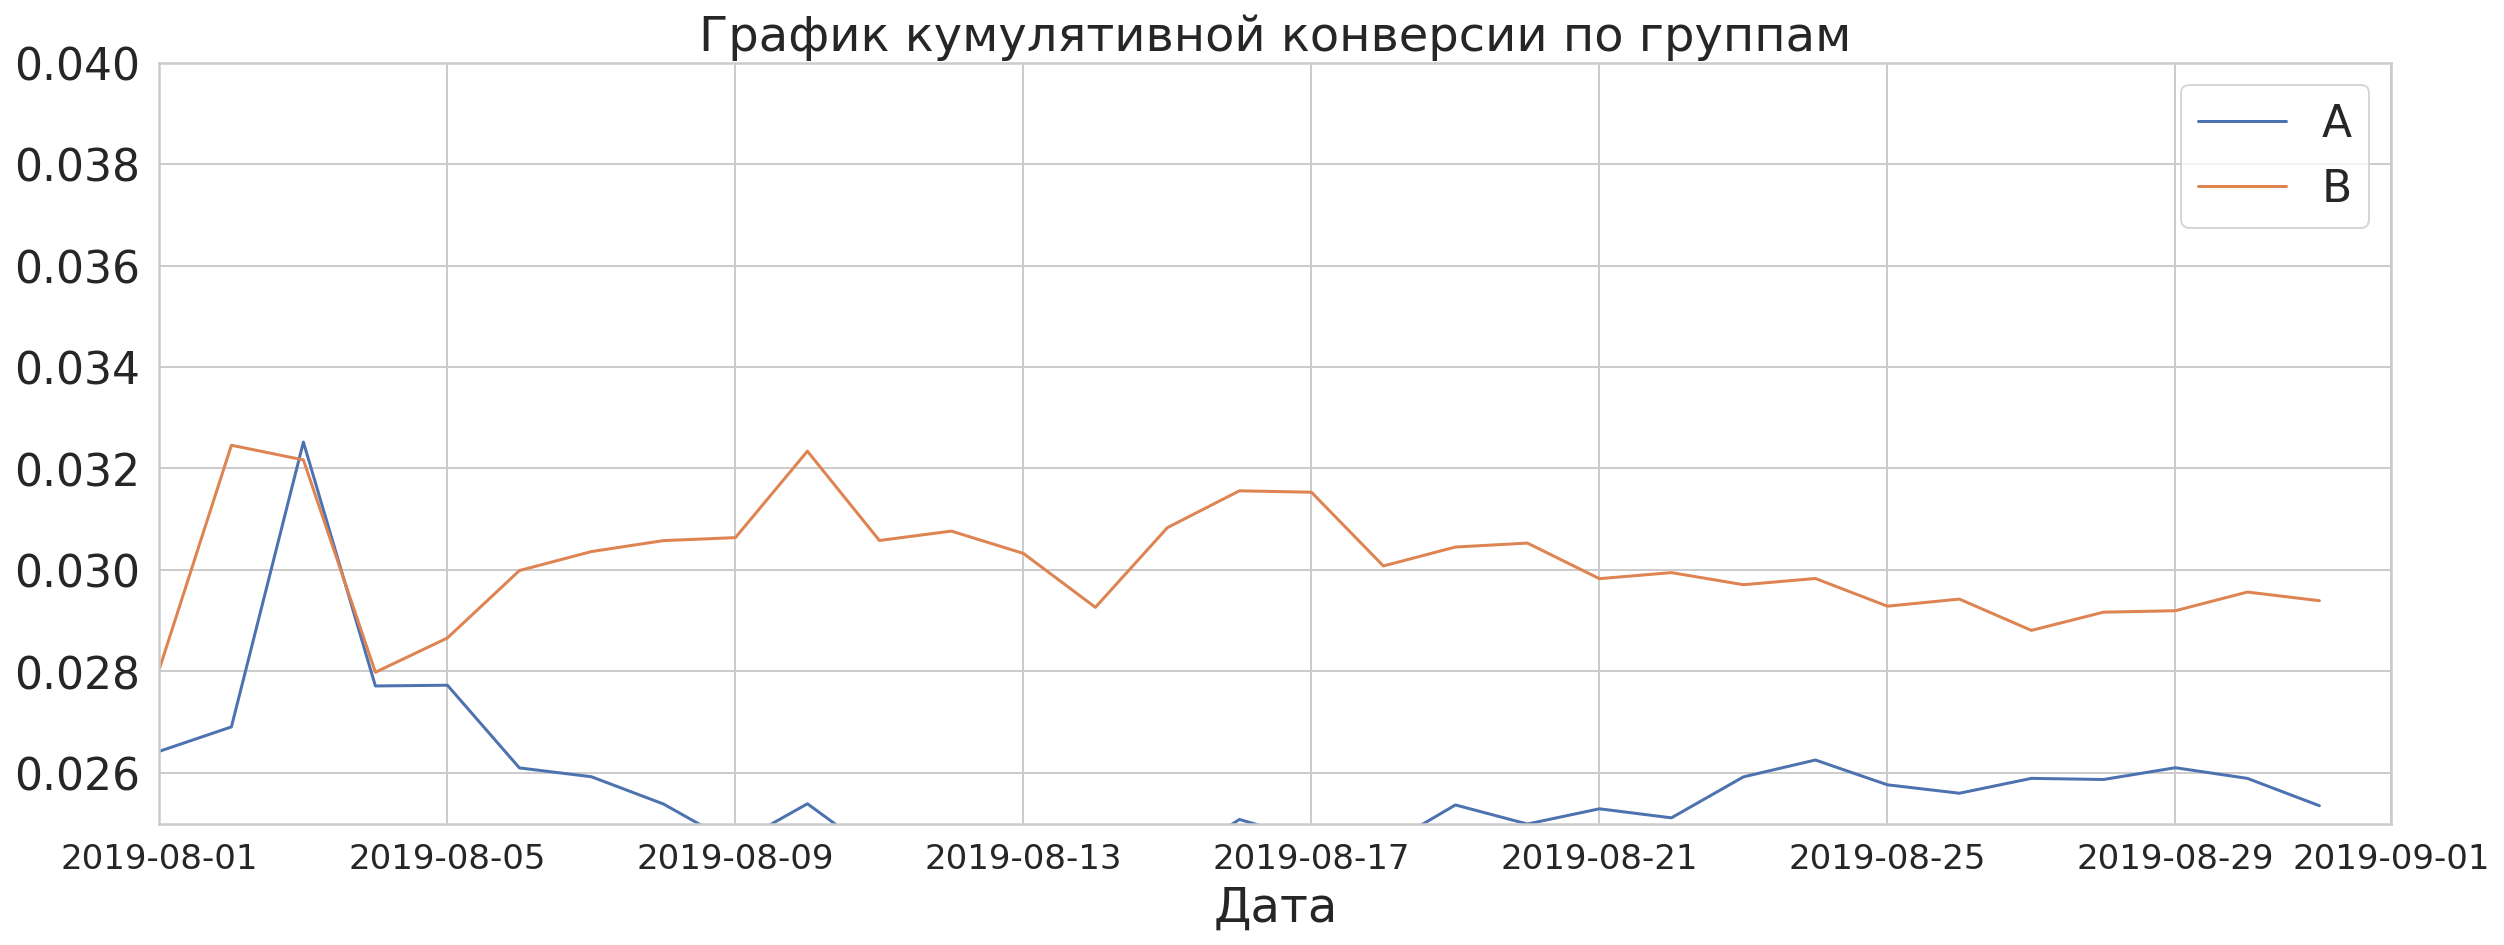

In [28]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=17)

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.025, 0.04])

plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата');

**Вывод**      
Абсолютное значение колебания варьируется в небольшом диапазоне - от 2,9% до 3,7%. В начале конверсия у сегмента В была больше сегмента А, но затем конверсия сегмента В немного выросла, а сегмента А снизилась. К 11 августу конверсия у обоих сегментов зафиксировалась и оставалась примерно на одном уровне до конца месяца. В целом, конверсия у группы В оказалась лучше группы А.

## Создание графика относительного изменения кумулятивной конверсии группы B к группе A.

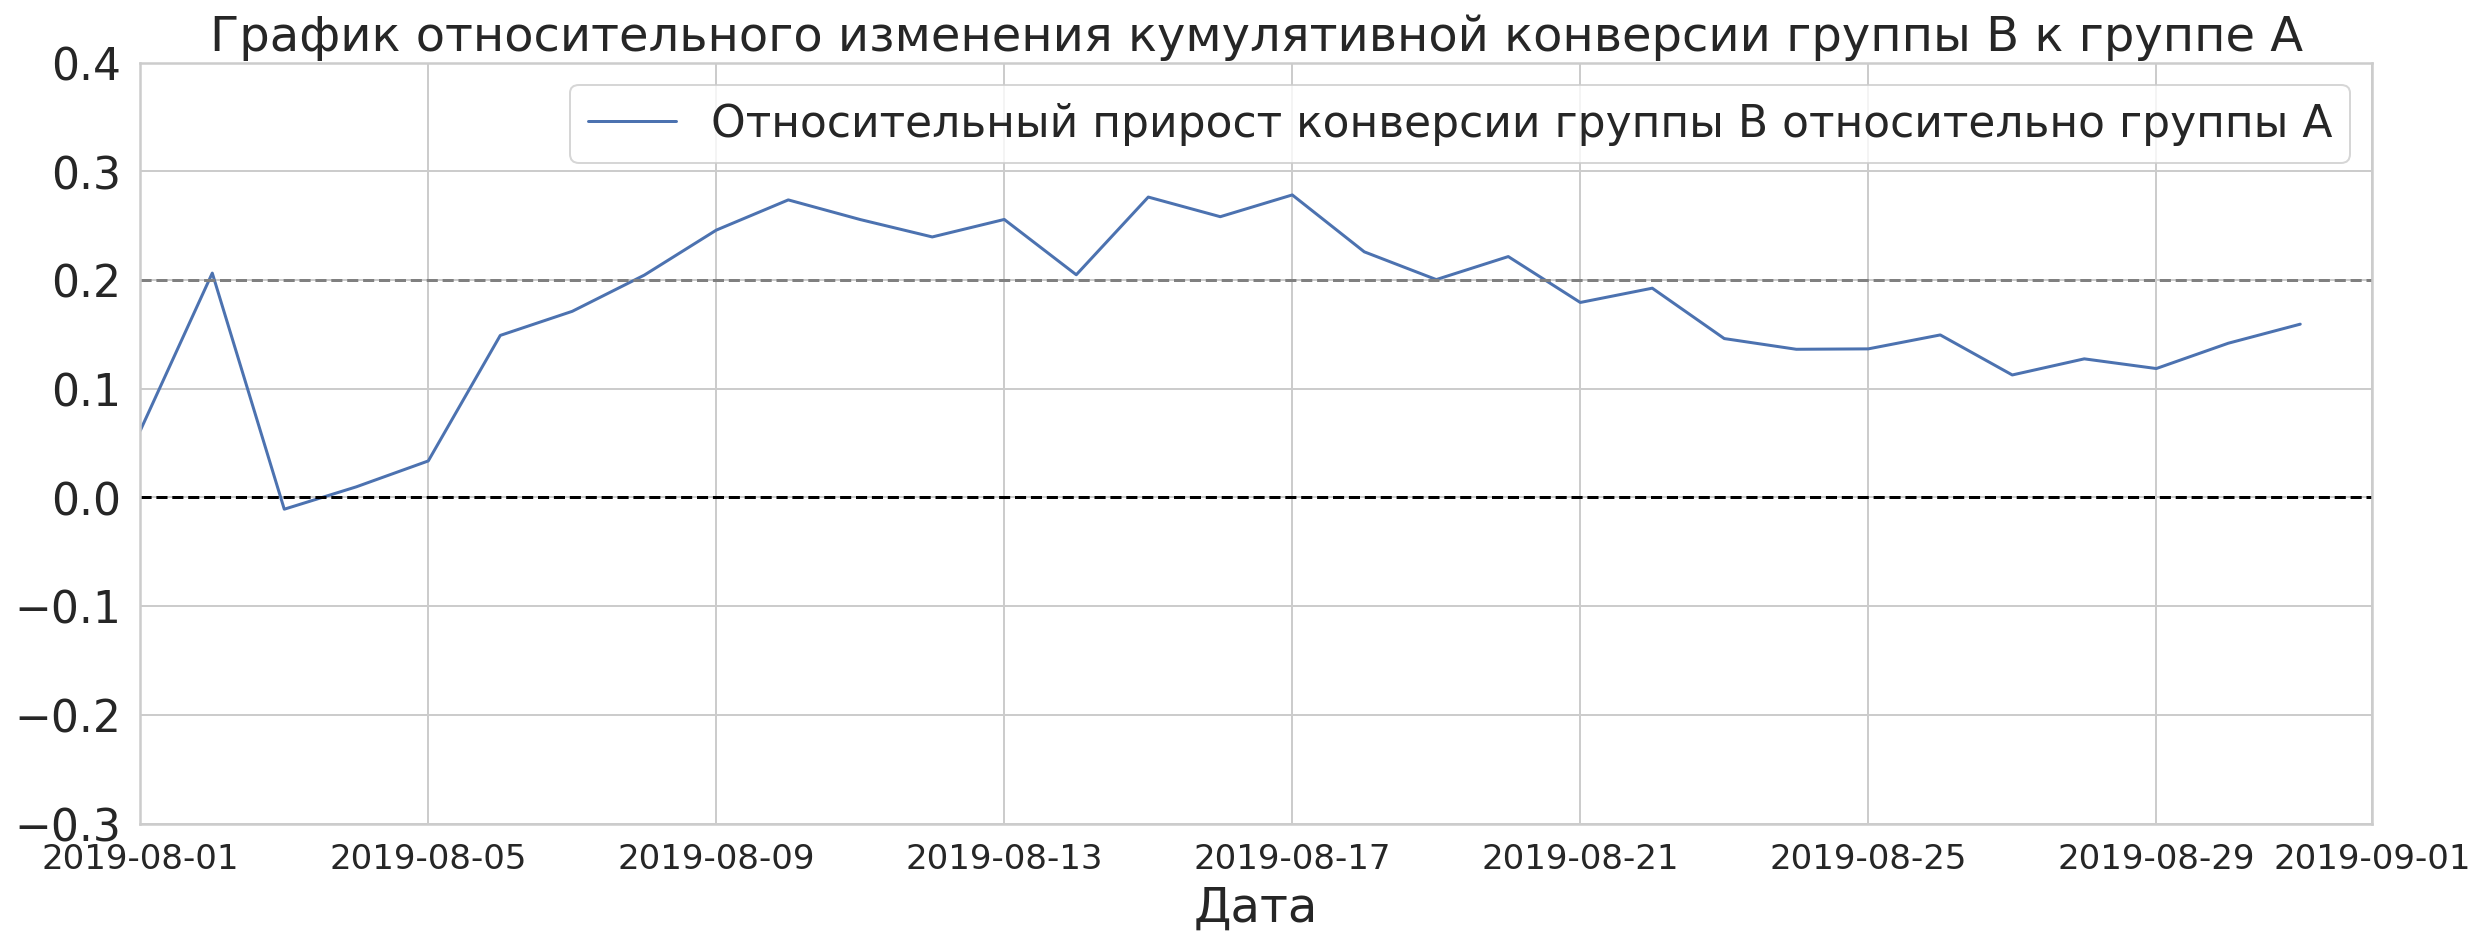

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.4])

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=17)

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата');

**Вывод**      
В начале теста группа В в основном проигрывала группе А, но с 6 августа окончательно вырвалась вперед. С 8 августа прирост колебался от 10 до 20%, постепенно снижаясь к концу месяца.

## Создание точечного графика количества заказов по пользователям.

      visitorId  orders
0       5114589       1
645  2666467773       1
679  2785527055       1
680  2801638130       1
681  2803209166       1
682  2805132315       1
683  2819072957       1
684  2819363575       1
685  2830871062       1
686  2837914161       1


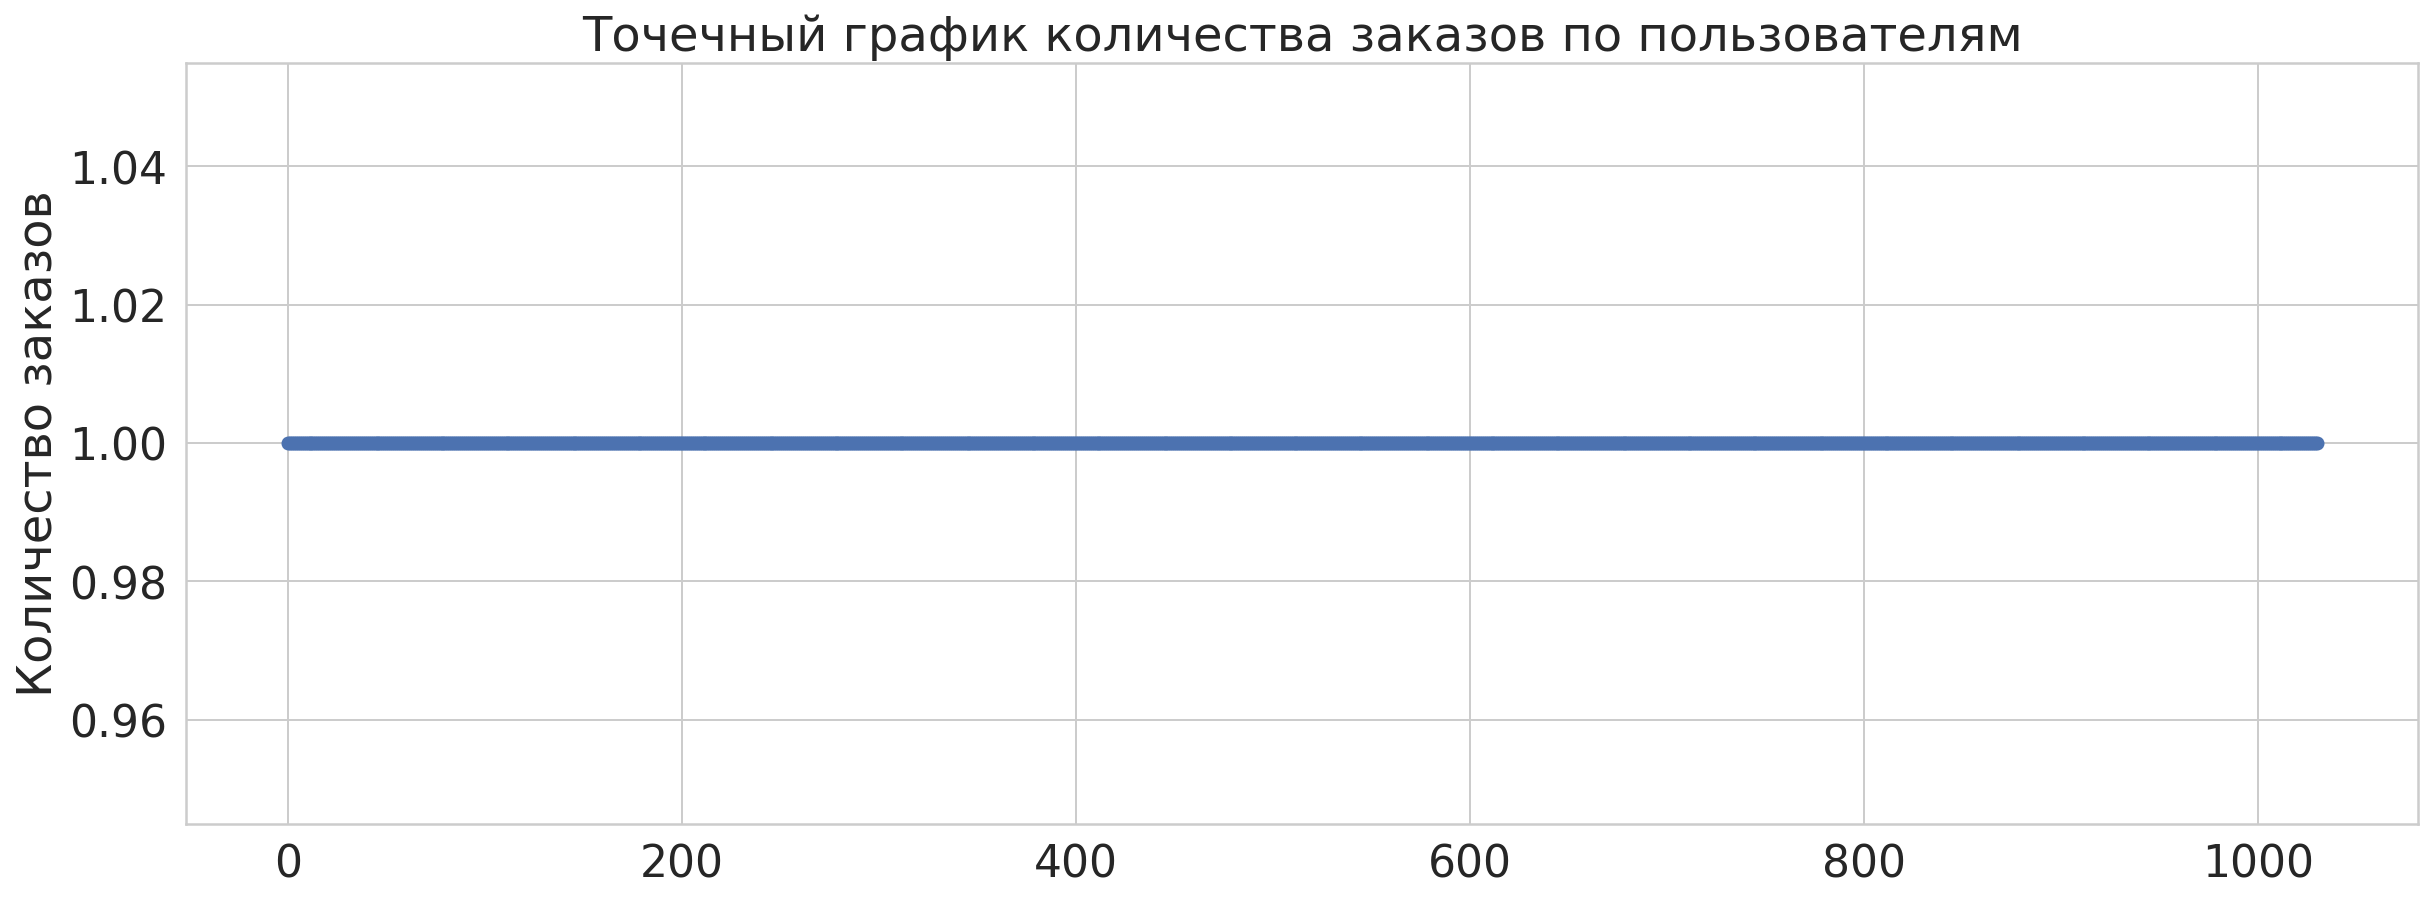

In [30]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов');

**Вывод**    
Пользователей, которые сделали более двух заказов, крайне мало. Есть определенное количество пользователей, которые сделали два заказа. Но для того, чтобы оценить, насколько много это, необходимо посчитать выборочные перцентили.

## Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [31]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 1.])

**Вывод**      
Не более 5% пользователей совершали больше одного заказа, как и не более 1% пользователей. Целесообразно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

## Создание точечныого графика стоимостей заказов.

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A
949      1347999392   887908475 2019-08-21    60450     A


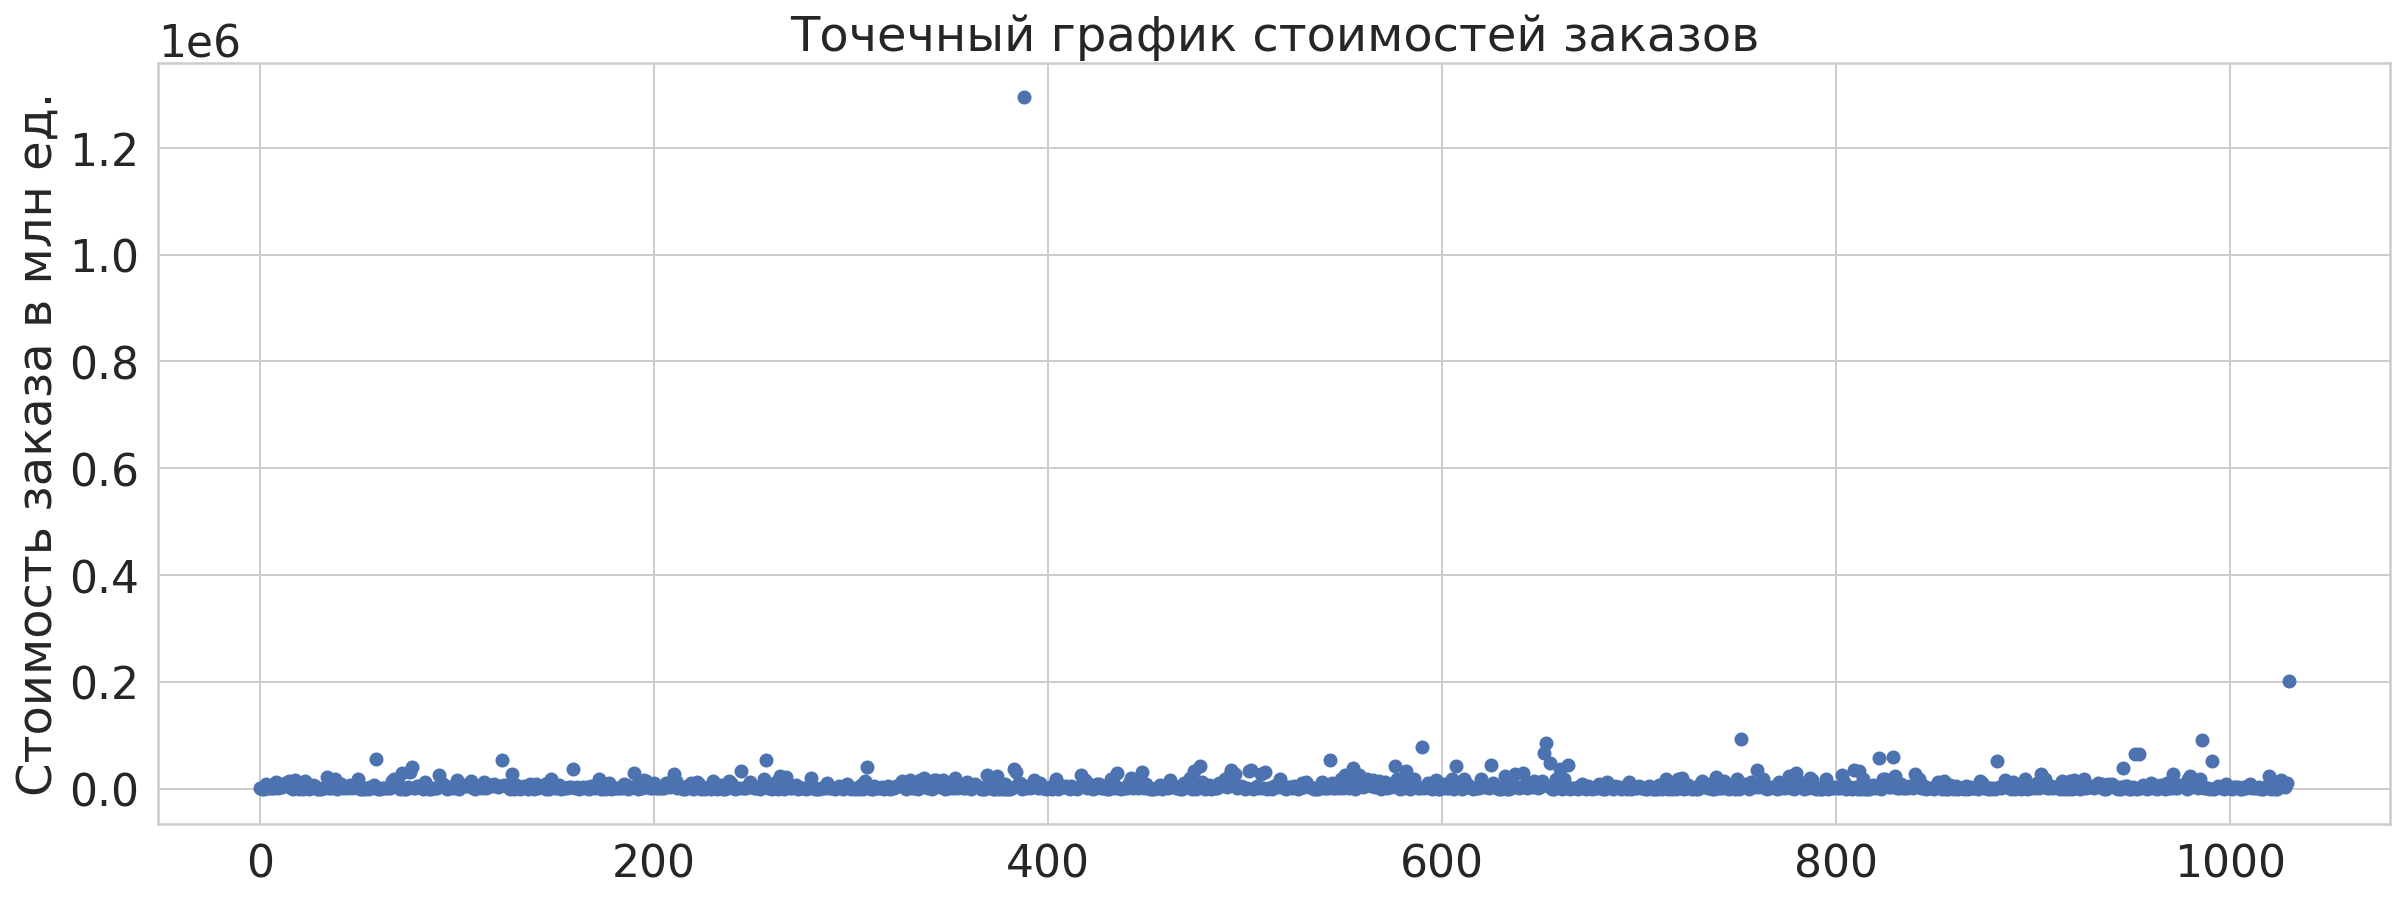

In [32]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн ед.');

**Вывод**      
На графике зафиксирован самый крупный заказ на сумму 1 294 500 ед. Данный заказ является крайне аномальным в сравнении с другими заказами. Далее виден заказ в размере 202 740 ед. Все остальные заказы ниже 93 940 ед.

## Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.

In [33]:
np.percentile(orders['revenue'], [95, 99])

array([28022.5, 57980. ])

**Вывод**      
Не более, чем у 5% пользователей чек дороже 28 тыс. ед. Не больше, чем у 1% - дороже 57 980 ед. Границей для определения аномальных заказов следует обозначить 28 тыс. ед.

## Расчет статистической значимости различий в конверсии между группами по «сырым» данным.

Н0 - Нулевая гипотеза: различий в конверсии между группами нет.

Н1 - Альтернативная гипотеза: различия в конверсии между группами есть.

In [34]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

# пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value равен '"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост конверсии группы В к конверсии группы А равен '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value равен 0.01629
Относительный прирост конверсии группы В к конверсии группы А равен 0.159


**Вывод**      
Первое число — p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы В к конверсии группы А равен 13,8%.

## Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Н0 - Нулевая гипотеза: различий в среднем чеке между группами нет.

Н1 - Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [35]:
print('p-value равен ''{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие среднего чека между сегментами - ''{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue']
                       .mean()-1)) 

p-value равен 0.896
Относительное различие среднего чека между сегментами - 0.259


**Вывод**      
P-value гораздо больше 0,05 - статистически значимых отличий в среднем чеке между группами нет.    
Относительное различие среднего чека между сегментами - 25,9%.

## Расчет статистической значимости различий в конверсии между группами по «очищенным» данным.

In [36]:
# срезы пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

# срезы пользователей
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value равен ''{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие среднего чека между сегментами - ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value равен 0.01902
Относительное различие среднего чека между сегментами - 0.160


**Вывод**      
За аномальных пользователей были приняты те, кто совершил 3 заказа и более, или совершил заказ на сумму свыше 28 000 ед. Как и в случае с сырыми данными, p-value не превысил 0,05, а значит, нулевую гипотезу отвергаем. Сегмент В оказался лучше по конверсии на 17,3%, еще лучше, чем до "очистки" данных.

## Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

In [37]:
print(
    'p-value равен '
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Разница в среднем чеке между двумя группами равен '
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value равен 0.906
Разница в среднем чеке между двумя группами равен -0.017


**Вывод**      
P-value оказался примерно на том же уровне как и с сырыми данными(0,738),следовательно нулевую гипотезу мы не можем отвергнуть. А вот средний чек у сегмента В снизился настолько, что сегмент А стал превосходить В, но всего лишь на 2%. После "очистки" данных, удаления выбросов разница в среднем чеке между двумя группами сократилась до минимума.

# Вывод

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: зафиксировались около среднего значения.

График различия среднего чека сильно колеблется, что свидетельствует о наличии аномалиий.

По итогам теста выявлено статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий, а вот статистически значимых различий по среднему чеку не были зафиксированы в обоих случаях.

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать превосходство группы В, результаты по конверсии которой оказались лучше группы А на 13,8% и 17,3% до и после "очистки" данных соответственно.